In [1]:
import sys
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

sys.path.append(os.path.abspath('..'))

from src.data_loader import load_data, clean_data

df = load_data()
df = clean_data(df)

categoryName
Health & Personal Care    8282750
Grocery                   4320950
Pet Supplies              3231200
Skin Care                 2095500
Storage & Organisation    1796900
Arts & Crafts             1048900
Make-up                   1009700
Office Supplies            968900
Office Paper Products      862450
Baby                       771000
Name: boughtInLastMonth, dtype: int64


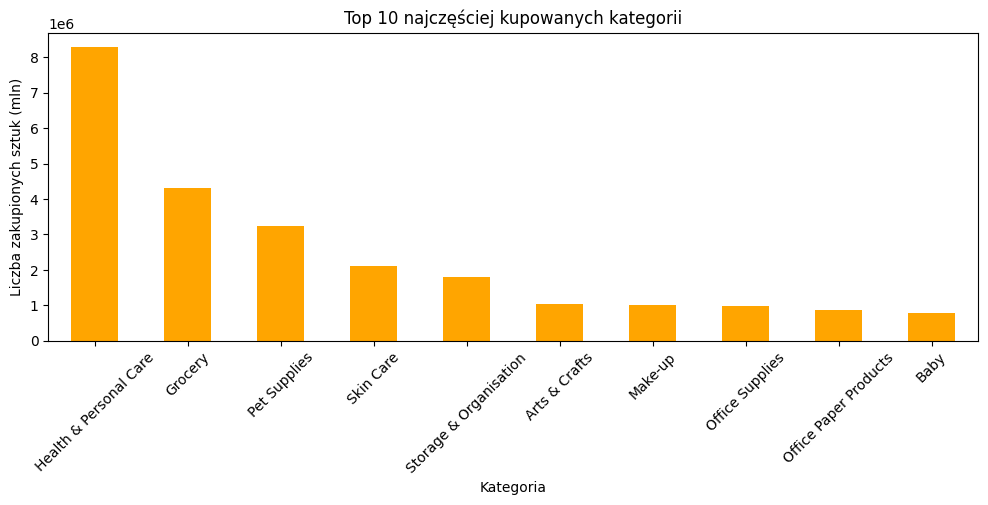

In [2]:
#Najczesciej kupowane kategorie

# Pogrupowanie kategorii produktów po liczbie zakupionych sztuk w zeszłym miesiącu
top_sales = df.groupby('categoryName')['boughtInLastMonth'].sum().sort_values(ascending=False)

print(top_sales.head(10))

# Wizualizacja 
top_sales.head(10).plot(kind='bar', figsize=(12,4), color='orange')
plt.title('Top 10 najczęściej kupowanych kategorii')
plt.xlabel('Kategoria')
plt.ylabel('Liczba zakupionych sztuk (mln)')   
plt.xticks(rotation=45)
plt.show()

Średnia cena w top 10 najczęściej kupowanych kategoriach:
categoryName
Arts & Crafts              8.686979
Baby                      18.106239
Grocery                   11.581803
Health & Personal Care    13.274778
Make-up                   10.827574
Office Paper Products      6.931286
Office Supplies           10.500240
Pet Supplies              15.535470
Skin Care                 16.339350
Storage & Organisation    15.844559
Name: price, dtype: float64
Średnia cena bestsellerów w top 10 najczęściej kupowanych kategoriach:
categoryName
Arts & Crafts             11.569755
Baby                      18.043085
Grocery                   10.012013
Health & Personal Care    13.507299
Make-up                    7.866000
Office Paper Products      5.739688
Office Supplies            8.393271
Pet Supplies              14.855141
Skin Care                  9.013276
Storage & Organisation    13.712254
Name: price, dtype: float64


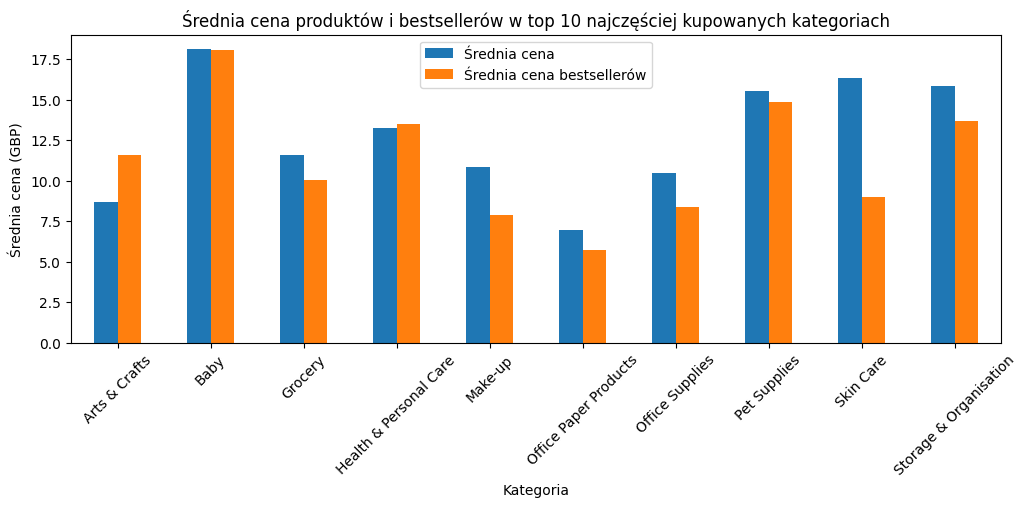

In [3]:
#Średnia cena produktów a średnia cena bestsellerów 

# Znalezienie danych dla top 10 najczęściej kupowanych kategorii
top10_sales = top_sales.head(10).index
df_top10 = df[df['categoryName'].isin(top10_sales)]

# Średnia cena produktu i bestsellerów w top 10 kategoriach
avg_price_topsales = df_top10.groupby('categoryName')['price'].mean()
avg_price_bestsellers = df_top10[df_top10['isBestSeller']].groupby('categoryName')['price'].mean()

print("Średnia cena w top 10 najczęściej kupowanych kategoriach:")
print(avg_price_topsales)

print("Średnia cena bestsellerów w top 10 najczęściej kupowanych kategoriach:")
print(avg_price_bestsellers)

# Wizualizacja
df_avg = pd.DataFrame({
    'Średnia cena': avg_price_topsales,
    'Średnia cena bestsellerów': avg_price_bestsellers
})

df_avg.plot(kind='bar', figsize=(12,4))
plt.title('Średnia cena produktów i bestsellerów w top 10 najczęściej kupowanych kategoriach')
plt.ylabel('Średnia cena (GBP)')
plt.xlabel('Kategoria')
plt.xticks(rotation=45)
plt.show()


categoryName
Vases                               1.600000
Handmade Home & Kitchen Products    1.496658
Beer, Wine & Spirits                0.987890
Computer Cases                      0.900901
Computer & Server Racks             0.826446
Gifts for Her                       0.823045
Digital Cameras                     0.820232
Dining Room Furniture               0.787402
Ski Goggles                         0.781250
Soft Toys                           0.766284
dtype: float64


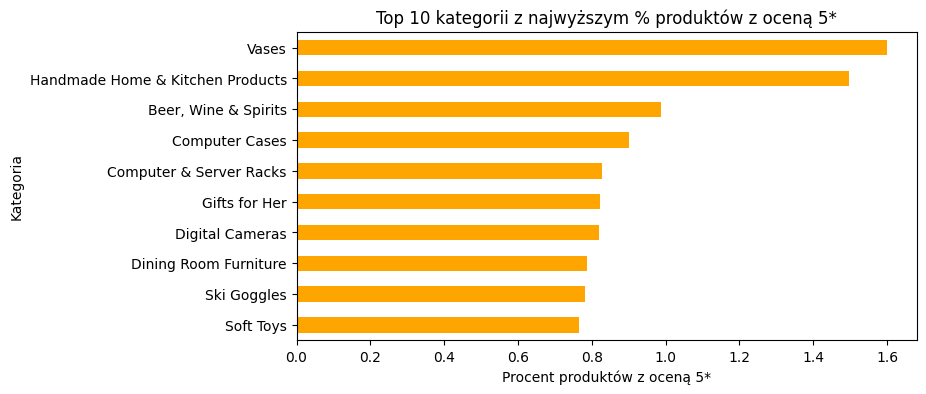

In [4]:
# Kategorie z najwyższym odsetkiem produktów z oceną 5*

category_total = df.groupby('categoryName').size()
fivestar_products = df[(df['stars'] == 5.0) & (df['reviews'] >= 10)] #znalezienie produktow z oceną 5* i min 10 recenzjami
fivestar_counts = fivestar_products['categoryName'].value_counts()
fivestar_percent = (fivestar_counts / category_total * 100).sort_values(ascending=False)


print(fivestar_percent.head(10))

#Wizualizacja
plt.figure(figsize=(8,4))
fivestar_percent.head(10).plot(kind='barh', color='orange')
plt.title('Top 10 kategorii z najwyższym % produktów z oceną 5*')
plt.xlabel('Procent produktów z oceną 5*')
plt.ylabel('Kategoria')
plt.gca().invert_yaxis() 
plt.show()

categoryName
Home Brewing & Wine Making       -0.695914
Motorbike Boots & Luggage        -0.599046
Motorbike Seat Covers            -0.579999
Outdoor Heaters & Fire Pits      -0.576157
Hiking Hand & Foot Warmers       -0.541208
Kitchen Storage & Organisation   -0.501044
Professional Medical Supplies    -0.470100
Kitchen Tools & Gadgets          -0.422122
Billiard, Snooker & Pool         -0.419537
Darts & Dartboards               -0.412400
Mobile Phones & Smartphones       0.303891
Smart Speakers                    0.370907
eBook Readers & Accessories       0.391165
Tennis Shoes                      0.391185
Tablets                           0.402662
Alexa Built-In Devices            0.406447
Basketball Footwear               0.426434
Golf Shoes                        0.478803
Equestrian Sports Boots           0.486802
Boating Footwear                  0.732987
dtype: float64


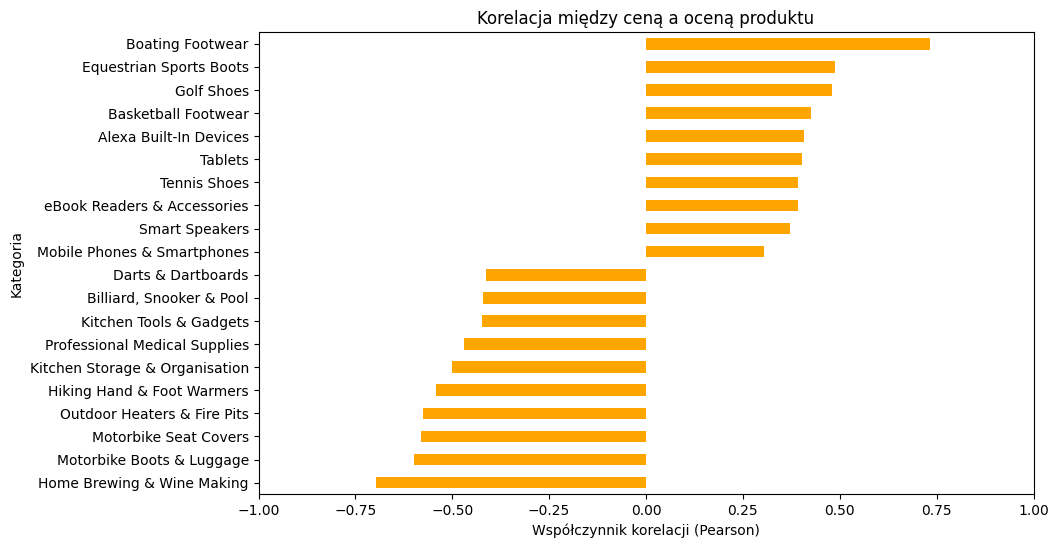

In [5]:
# Obliczenie współczynnika korelacji Pearsona między ceną a oceną dla każdej kategorii
correlations = (
    df.groupby('categoryName').apply(
        lambda g: g['price'].corr(g['stars']) 
        if g['price'].std() != 0 and g['stars'].std() != 0 and len(g) >= 2 
        else None
    )
    .sort_values()
)

top_corr = pd.concat([
    correlations.head(10), 
    correlations.tail(10) 
]).sort_values()

print(top_corr)

#Wizualizacja
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='orange')
plt.title('Korelacja między ceną a oceną produktu')
plt.xlabel('Współczynnik korelacji (Pearson)')
plt.ylabel('Kategoria')
plt.xlim(-1, 1)
plt.show()

categoryName
Home Brewing & Wine Making   -0.168575
Hiking Hand & Foot Warmers   -0.156419
Window Treatments            -0.152148
Vases                        -0.145420
Lighting                     -0.137797
Kitchen Linen                -0.134234
Children's Bedding           -0.134119
Plugs                        -0.133291
Bakeware                     -0.127102
Women                        -0.125674
Mobile Phone Accessories      0.011894
Hair Care                     0.013723
Office Paper Products         0.015807
Tablet Accessories            0.022385
Baby                          0.025273
Vacuums & Floorcare           0.026398
Wearable Technology           0.027920
Toy Advent Calendars          0.033438
Bedding Accessories           0.062976
Slipcovers                    0.283602
dtype: float64


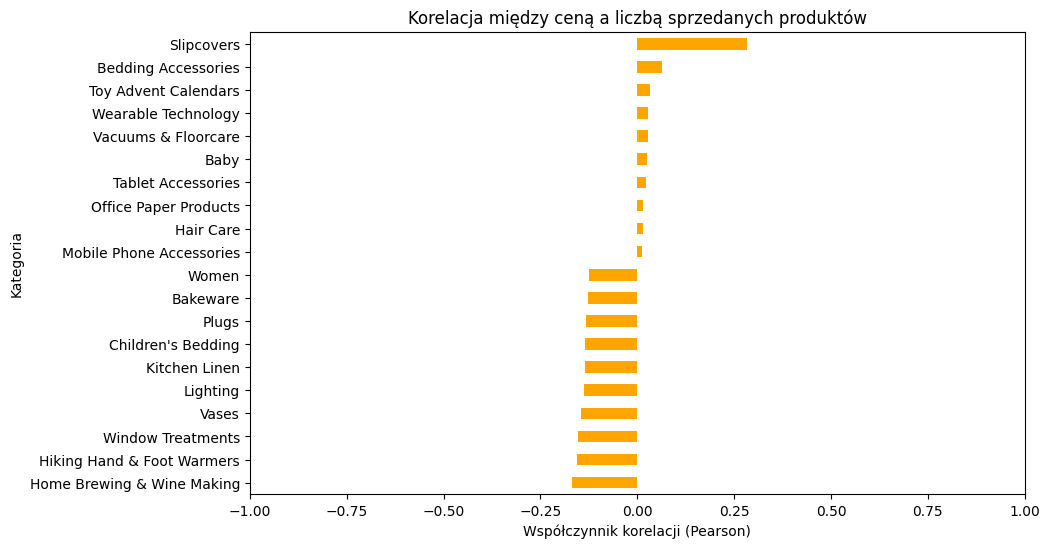

In [6]:
# Obliczenie współczynnika korelacji Pearsona między ceną a liczbą sprzedanych produktów każdej kategorii

korelacja_zakupy = (
    df.groupby('categoryName', group_keys=False)
      .apply(lambda g: g['price'].corr(g['boughtInLastMonth']) 
             if g['price'].std() != 0 and g['boughtInLastMonth'].std() != 0 and len(g) >= 2 
             else None)
      .dropna()
      .sort_values()
)

top_corr = pd.concat([
    korelacja_zakupy.head(10),
    korelacja_zakupy.tail(10)
]).sort_values()

print(top_corr)


# Wizualizacja
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='orange')
plt.title('Korelacja między ceną a liczbą sprzedanych produktów')
plt.xlabel('Współczynnik korelacji (Pearson)')
plt.ylabel('Kategoria')
plt.xlim(-1, 1)
plt.show()